In [370]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [394]:
## 함수 init
# 2006년 이후는 2005년으로 치환하여 갯수 카운트

def count_store(df):
    # 2006~2024년 구간의 인허가 연도별 카운트
    permit_count = df[df['인허가년도'].between(2005, 2024)].groupby('인허가년도').size()

    # # 누적 카운트 (각 년도별로 그 이전 년도까지의 합을 포함)
    # cumulative_permit_count = permit_count.cumsum()

    # 폐업년도 처리: 2005년 이후로 폐업한 사업장만 해당하며, 폐업년도가 있는 데이터만 필터링
    closure_count = df[df['폐업연도'].notna() & df['폐업연도'].between(2005, 2024)]

    # 폐업연도에 해당하는 사업장 개수를 각 연도별로 빼기
    closure_count = closure_count.groupby('폐업연도').size()

    # # 2006년을 0으로 추가
    # closure_count = pd.concat([pd.Series({2005: 0}), closure_count])

    # 정렬 (연도 순서대로)
    closure_count = closure_count.sort_index()
    
    # 누적 카운트, 년도별 카운트, 폐점 카운트, 최종 카운트(누적카운트-폐점카운트)
    return permit_count, closure_count

In [395]:
import os
os.chdir("/Users/shinjh/Desktop/likelion/mid_project/dataset_life_infra")

dataset_list = [x for x in os.listdir() if 'dataset_life_infra' in x]

In [396]:
dataset_list = [x for x in os.listdir() if 'dataset_life_infra' in x]

In [397]:
data = [x for x in dataset_list if '일반음식점_인' in x]
print(data)

['dataset_life_infra_일산_일반음식점_인허가일자포함.csv', 'dataset_life_infra_분당_일반음식점_인허가일자포함.csv']


In [398]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

# 음식점 점포수

## 분당처리
- 2006년 이전 데이터 -> 전부 2006년도로 치환 후 누적합산 처리

In [399]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2005로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 필요한 열만 선택
filtered_data_bundang = filtered_data_bundang[["사업장명", "소재지도로명주소", "소재지지번주소", "위도", "경도", "영업상태명", "인허가일자", "폐업일자", "업태구분명정보", "인허가년도", "폐업연도"]]


## 일산 처리

In [400]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 필요한 열만 선택
filtered_data_ilsan = filtered_data_ilsan[["사업장명", "소재지도로명주소", "소재지지번주소", "위도", "경도", "영업상태명", "인허가일자", "폐업일자", "업태구분명정보", "인허가년도", "폐업연도"]]


In [401]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# # 증감률 시작일자 0으로 변경
change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 

# 데이터 프레임화
count_df_bundang = pd.DataFrame([permit_bundang_count ,closure_bundang_count, change_rate_bundang, change_rate_bundang.cumsum()]).T.reset_index()
count_df_bundang.columns = ['년도', '인허가갯수','폐업갯수', '증감률','년도별갯수']

In [405]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

# # 증감률 시작일자 0으로 변경
change_rate_ilsan = permit_ilsan_count - closure_ilsan_count
# change_rate_ilsan.iloc[0] = 0 

count_df_ilsan = pd.DataFrame([permit_ilsan_count ,closure_ilsan_count, change_rate_ilsan,change_rate_ilsan.cumsum()]).T.reset_index()
count_df_ilsan.columns = ['년도','인허가갯수','폐업갯수', '증감률','년도별갯수']
    

In [406]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,4027,459,3568,3568
1,2006,410,511,-101,3467
2,2007,410,386,24,3491
3,2008,353,474,-121,3370
4,2009,398,306,92,3462
5,2010,476,335,141,3603
6,2011,503,338,165,3768
7,2012,535,360,175,3943
8,2013,497,270,227,4170
9,2014,527,345,182,4352


In [407]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,5731,533,5198,5198
1,2006,760,713,47,5245
2,2007,853,642,211,5456
3,2008,582,575,7,5463
4,2009,676,850,-174,5289
5,2010,701,564,137,5426
6,2011,658,636,22,5448
7,2012,559,470,89,5537
8,2013,635,531,104,5641
9,2014,633,482,151,5792


In [408]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과


# 다른 MacOS 폰트 경로 (AppleGothic)
rc('font', family='AppleGothic') 

# 마이너스 기호 문제 해결하기
plt.rcParams['axes.unicode_minus'] = False

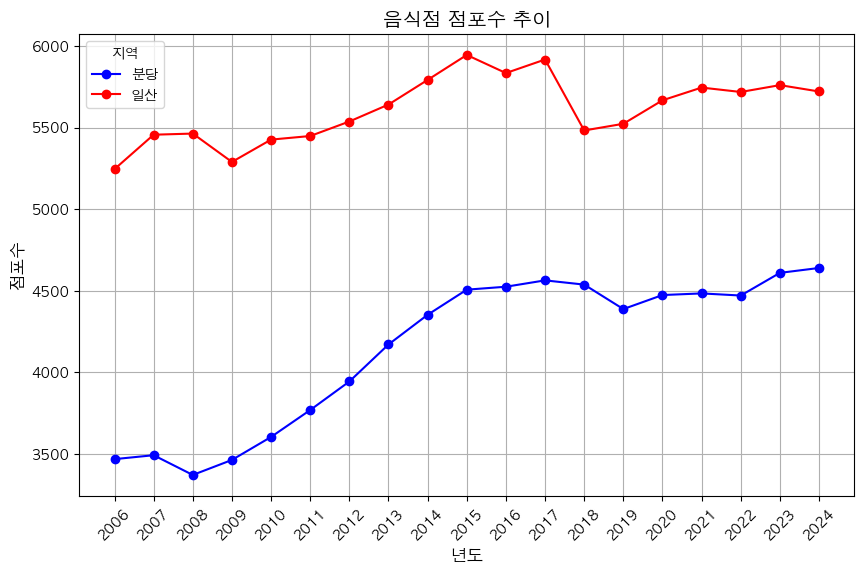

In [409]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('음식점 점포수 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang.loc[1:]['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

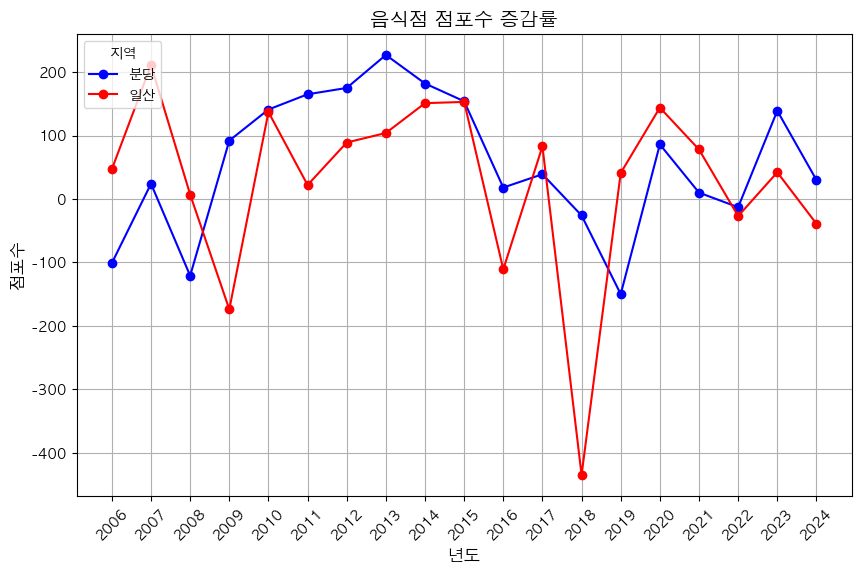

In [410]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['증감률'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['증감률'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('음식점 점포수 증감률', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang.loc[1:]['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

# 학교

In [419]:
data = [x for x in dataset_list if '학교' in x]
print(data)

['dataset_life_infra_일산_학교.csv', 'dataset_life_infra_분당_학교.csv']


In [420]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

In [421]:
data_bundang['설립년도'] = data_bundang['설립일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang.loc[:, '설립년도'] = data_bundang['설립년도'].apply(lambda x: 2005 if int(x) < 2006 else x)
data_bundang_count = data_bundang.groupby('설립년도').size()

data_ilsan['설립년도'] = data_ilsan['설립일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan.loc[:, '설립년도'] = data_ilsan['설립년도'].apply(lambda x: 2005 if int(x) < 2006 else x)
data_ilsan_count = data_ilsan.groupby('설립년도').size()

In [422]:
school_index = range(2005, 2025)

count_df_school = pd.DataFrame(index=school_index)
count_df_school['분당_설립년도_카운트'] = data_bundang_count
count_df_school['일산_설립년도_카운트'] = data_ilsan_count

count_df_school = count_df_school.reset_index()
count_df_school.columns = ['년도', '분당_설립년도_카운트' ,'일산_설립년도_카운트']

# NaN 값을 0으로 채우기
count_df_school = count_df_school.fillna(0).astype(int)
display(count_df_school)

,년도,분당_설립년도_카운트,일산_설립년도_카운트
0,2005,68,72
1,2006,1,5
2,2007,0,1
3,2008,1,6
4,2009,8,0
5,2010,6,2
6,2011,1,5
7,2012,0,2
8,2013,1,0
9,2014,0,0


In [424]:
count_df_school_cumulative = count_df_school.copy()
count_df_school_cumulative['분당_설립년도_카운트'] = count_df_school_cumulative['분당_설립년도_카운트'].cumsum()
count_df_school_cumulative['일산_설립년도_카운트'] = count_df_school_cumulative['일산_설립년도_카운트'].cumsum()
# count_df_school_cumulative = count_df_school_cumulative.reset_index()
count_df_school_cumulative.columns = ['년도', '분당_설립년도_카운트' ,'일산_설립년도_카운트']
display(count_df_school_cumulative)

,년도,분당_설립년도_카운트,일산_설립년도_카운트
0,2005,68,72
1,2006,69,77
2,2007,69,78
3,2008,70,84
4,2009,78,84
5,2010,84,86
6,2011,85,91
7,2012,85,93
8,2013,86,93
9,2014,86,93


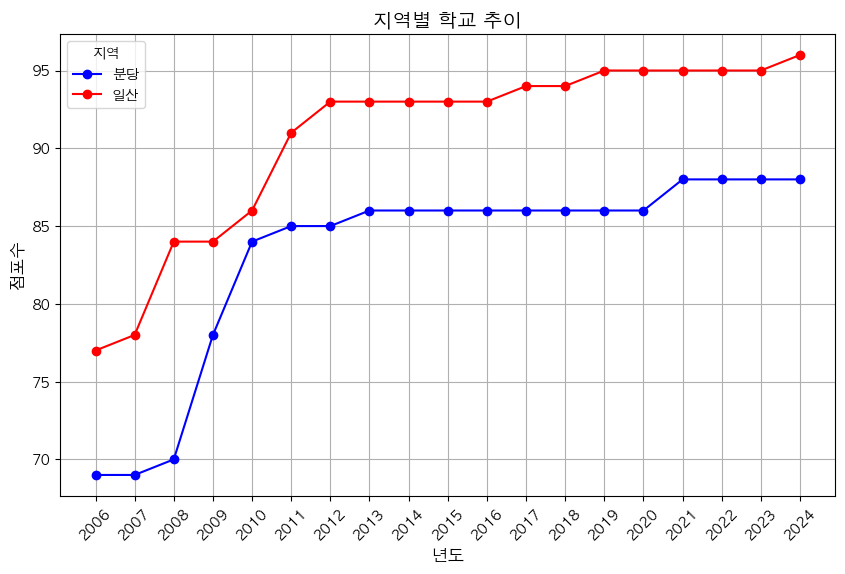

In [425]:
## 학교
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_school_cumulative.loc[1:]['년도'], count_df_school_cumulative.loc[1:]['분당_설립년도_카운트'], marker='o', color='b', linestyle='-')
plt.plot(count_df_school_cumulative.loc[1:]['년도'], count_df_school_cumulative.loc[1:]['일산_설립년도_카운트'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('지역별 학교 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_school_cumulative.loc[1:]['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

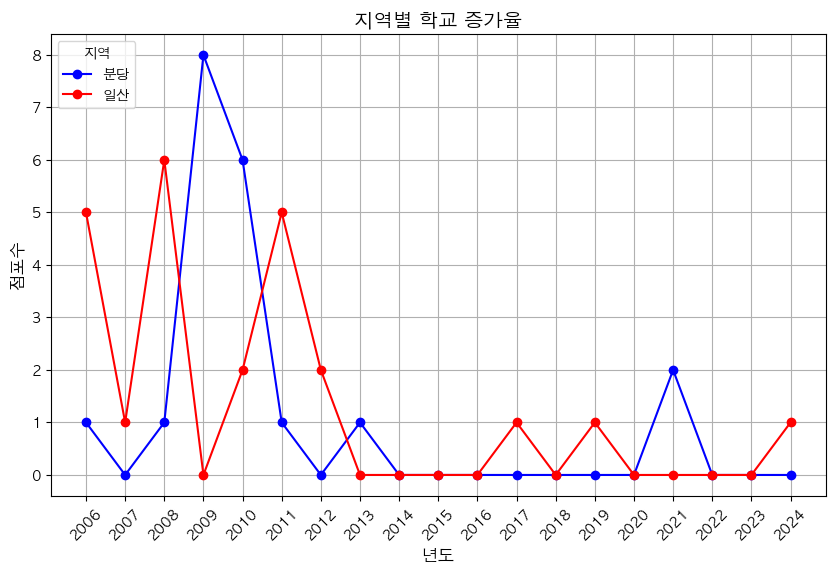

In [426]:
## 학교
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_school.loc[1:]['년도'], count_df_school.loc[1:]['분당_설립년도_카운트'], marker='o', color='b', linestyle='-')
plt.plot(count_df_school.loc[1:]['년도'], count_df_school.loc[1:]['일산_설립년도_카운트'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('지역별 학교 증가율', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_school.loc[1:]['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

# 병원 및 의원

In [427]:
data = [x for x in dataset_list if '병원' in x]
print(data)

['dataset_life_infra_일산_병원.csv', 'dataset_life_infra_분당_병원.csv']


In [428]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

## 분당

In [433]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [ ]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# 증감률 계산
change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 


In [439]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']


In [440]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,22,0,22,22
1,2006,5,3,2,24
2,2007,1,0,1,25
3,2008,0,2,-2,23
4,2009,1,0,1,24
5,2010,2,1,1,25
6,2011,2,2,0,25
7,2012,3,1,2,27
8,2013,2,1,1,28
9,2014,0,2,-2,26


## 일산

In [441]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [445]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

In [446]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [449]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,16,0,16,16
1,2006,4,0,4,20
2,2007,8,0,8,28
3,2008,6,3,3,31
4,2009,8,2,6,37
5,2010,2,2,0,37
6,2011,1,2,-1,36
7,2012,5,1,4,40
8,2013,4,2,2,42
9,2014,4,2,2,44


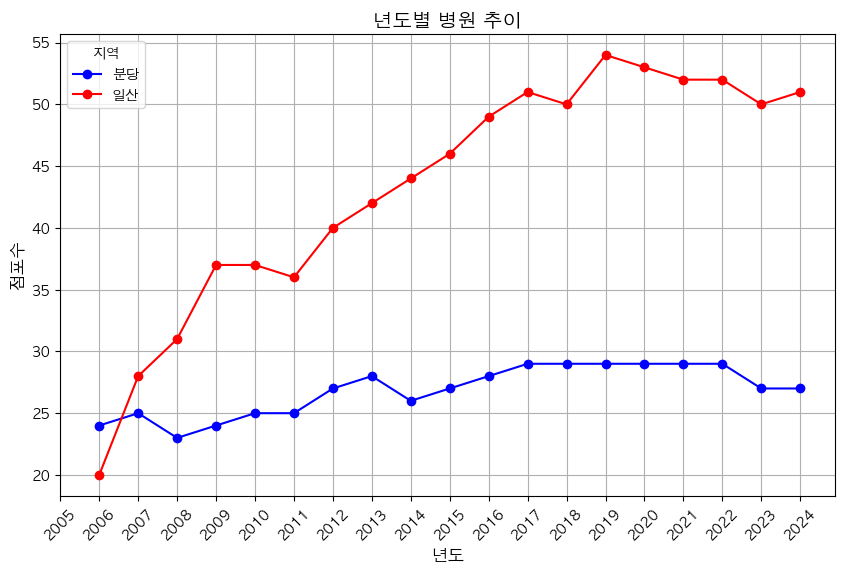

In [450]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 병원 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

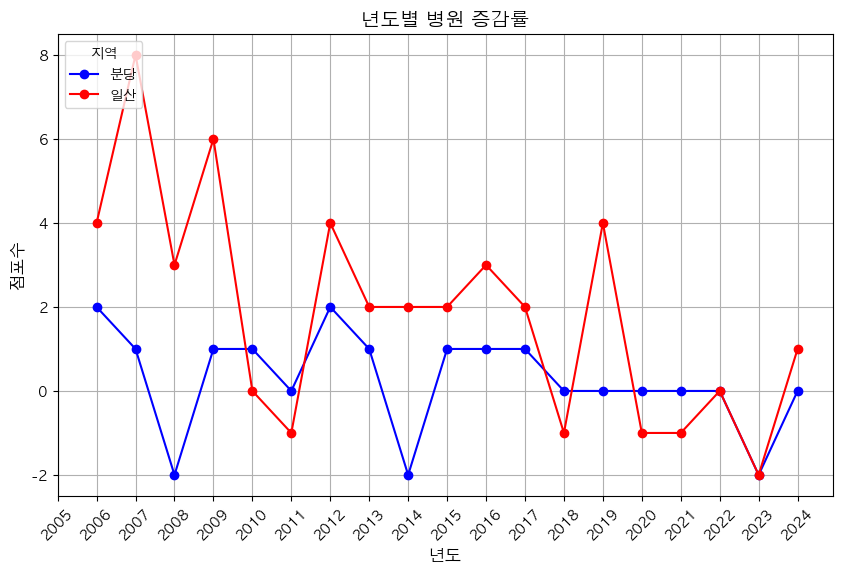

In [451]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['증감률'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['증감률'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 병원 증감률', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

## 의원

In [452]:
data = [x for x in dataset_list if '의원' in x]
print(data)

['dataset_life_infra_일산_의원.csv', 'dataset_life_infra_분당_의원.csv']


In [453]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

In [454]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [456]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

# # 증감률 시작일자 0으로 변경
# change_rate_bundang = permit_bundang_count - closure_bundang_count
# change_rate_bundang.iloc[0] = 0 

In [457]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [458]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,632,55,577,577
1,2006,87,51,36,613
2,2007,73,51,22,635
3,2008,60,43,17,652
4,2009,42,34,8,660
5,2010,69,37,32,692
6,2011,70,27,43,735
7,2012,63,23,40,775
8,2013,58,37,21,796
9,2014,50,31,19,815


# 일산

In [459]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '폐업연도'] = filtered_data_ilsan['폐업연도'].apply(lambda x: 2005 if x < 2006 else x)

In [460]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

# # 증감률 시작일자 0으로 변경
# change_rate_ilsan = permit_ilsan_count - closure_ilsan_count
# change_rate_ilsan.iloc[0] = 0 

In [461]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [462]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,441,0,441,441
1,2006,79,0,79,520
2,2007,61,2,59,579
3,2008,52,33,19,598
4,2009,48,48,0,598
5,2010,36,34,2,600
6,2011,42,31,11,611
7,2012,46,32,14,625
8,2013,36,39,-3,622
9,2014,45,24,21,643


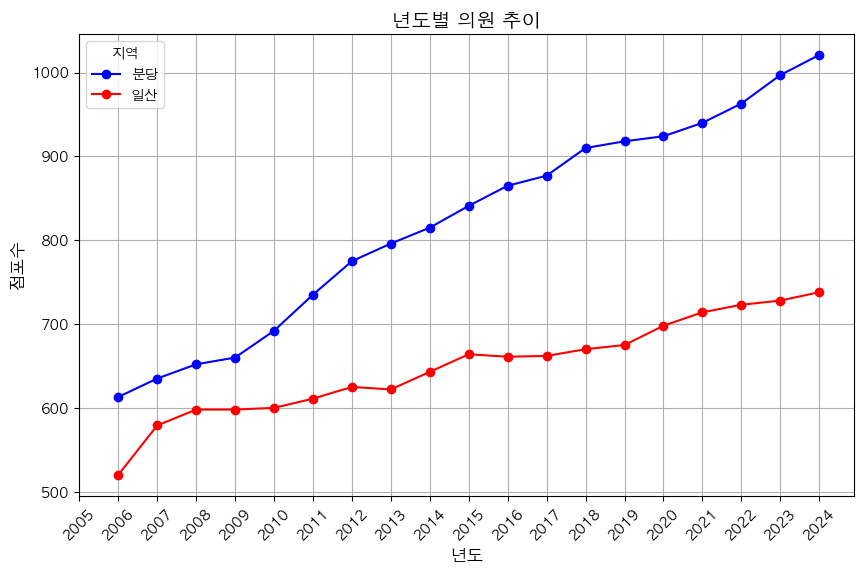

In [466]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 의원 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

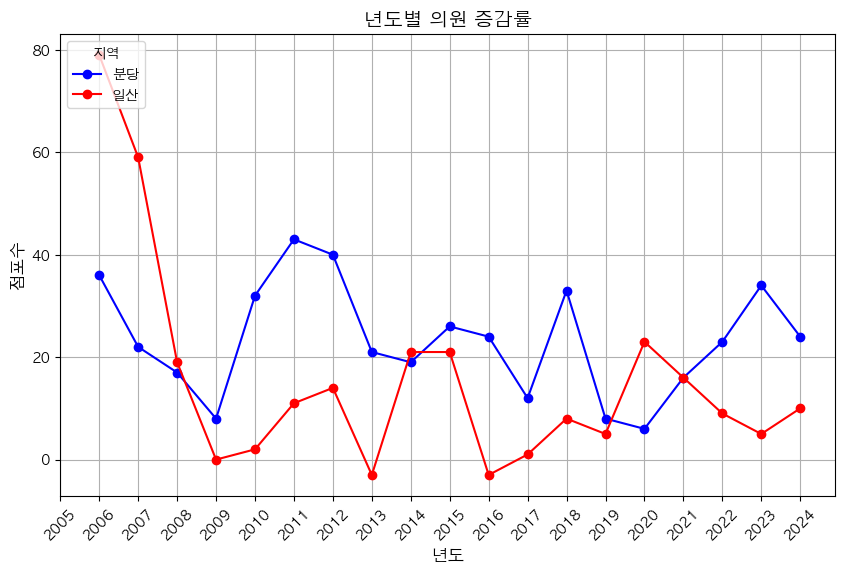

In [465]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['증감률'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['증감률'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 의원 증감률', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

# 대규모점포

In [471]:
data = [x for x in dataset_list if '대규모점포_인허가' in x]
print(data)

['dataset_life_infra_분당_대규모점포_인허가일자포함.csv', 'dataset_life_infra_일산_대규모점포_인허가일자포함.csv']


In [472]:
data_bundang = pd.read_csv(next((x for x in data if '분당' in x)))
data_ilsan = pd.read_csv(next((x for x in data if '일산' in x)))

In [473]:
data_bundang.head()

,Unnamed: 0,사업장명,영업상태명,인허가일자,폐업일자,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,업태구분명정보
0,0,GS THE FRESH 분당이매역점,영업개시전,2023-11-08,NaN,"경기도 성남시 분당구 이매로 45, 이수프라자 (이매동)",경기도 성남시 분당구 이매동 115-2 이수프라자,37.394981,127.125889,그 밖의 대규모점포
1,1,일렉트로마트 판교점,영업개시전,2016-03-21,NaN,"경기도 성남시 분당구 대왕판교로606번길 10 (백현동, 알파리움1단지)",경기도 성남시 분당구 백현동 531번지,37.395846,127.109063,전문점
2,2,돌고래시장,정상영업,1996-12-20,NaN,경기도 성남시 분당구 내정로174번길 42 (수내동),경기도 성남시 분당구 수내동 53호,37.371197,127.122076,시장
3,3,미래타운제2종합시장,정상영업,1994-12-02,NaN,경기도 성남시 분당구 불정로376번길 31 (서현동),경기도 성남시 분당구 서현동 311호,37.372287,127.138910,그 밖의 대규모점포
4,4,"테마폴리스 지상1,2층",정상영업,2005-05-27,NaN,"경기도 성남시 분당구 성남대로925번길 16 (야탑동,테마폴리스 지상1,2층)","경기도 성남시 분당구 야탑동 341번지 테마폴리스 지상1,2층",37.413026,127.127214,그 밖의 대규모점포


In [474]:
# 인허가년도, 폐업연도 처리 부분
data_bundang['인허가년도'] = data_bundang['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_bundang['폐업연도'] = data_bundang['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_bundang = data_bundang[data_bundang['폐업연도'].isna()]
filter_2_bundang = data_bundang[data_bundang['폐업연도'].notna() & (data_bundang['폐업연도'] >= 2005)]

# filter_2_bundang에서 폐업연도를 Int64로 변환
filter_2_bundang.loc[:, '폐업연도'] = filter_2_bundang['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_bundang = pd.concat([filter_1_bundang, filter_2_bundang]).reset_index(drop=True)

# 데이터 복사
filtered_data_bundang = filtered_after_2006_bundang.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_bundang.loc[:, '인허가년도'] = filtered_data_bundang['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [475]:
permit_bundang_count, closure_bundang_count = count_store(filtered_data_bundang)

In [476]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_bundang = pd.DataFrame(index=index)
count_df_bundang['인허가갯수'] = permit_bundang_count
count_df_bundang['폐업갯수'] = closure_bundang_count
count_df_bundang = count_df_bundang.fillna(0).astype(int)

count_df_bundang['증감률'] = count_df_bundang['인허가갯수'] - count_df_bundang['폐업갯수']
count_df_bundang['년도별갯수'] = count_df_bundang['증감률'].cumsum()

count_df_bundang = count_df_bundang.reset_index()

count_df_bundang.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [477]:
count_df_bundang

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,50,0,50,50
1,2006,1,0,1,51
2,2007,1,0,1,52
3,2008,0,0,0,52
4,2009,2,0,2,54
5,2010,2,0,2,56
6,2011,5,0,5,61
7,2012,7,0,7,68
8,2013,5,0,5,73
9,2014,1,0,1,74


In [478]:
# 인허가년도, 폐업연도 처리 부분
data_ilsan['인허가년도'] = data_ilsan['인허가일자'].apply(lambda x: int(x.split("-")[0]))
data_ilsan['폐업연도'] = data_ilsan['폐업일자'].apply(lambda x: int(x.split("-")[0]) if pd.notnull(x) else None)

# 필터링 및 데이터 처리
filter_1_ilsan = data_ilsan[data_ilsan['폐업연도'].isna()]
filter_2_ilsan = data_ilsan[data_ilsan['폐업연도'].notna() & (data_ilsan['폐업연도'] >= 2005)]

# filter_2_ilsan에서 폐업연도를 Int64로 변환
filter_2_ilsan.loc[:, '폐업연도'] = filter_2_ilsan['폐업연도'].astype('Int64')

# 필터링된 데이터 결합
filtered_after_2006_ilsan = pd.concat([filter_1_ilsan, filter_2_ilsan]).reset_index(drop=True)

# 데이터 복사
filtered_data_ilsan = filtered_after_2006_ilsan.copy()

# 인허가년도 변경 처리 (2006년 이전은 2006으로 설정)
filtered_data_ilsan.loc[:, '인허가년도'] = filtered_data_ilsan['인허가년도'].apply(lambda x: 2005 if x < 2006 else x)

In [480]:
permit_ilsan_count, closure_ilsan_count = count_store(filtered_data_ilsan)

In [481]:
# Index 생성 (2006~2024)
index = range(2005, 2025)
# 신규 데이터프레임 생성

count_df_ilsan = pd.DataFrame(index=index)
count_df_ilsan['인허가갯수'] = permit_ilsan_count
count_df_ilsan['폐업갯수'] = closure_ilsan_count
count_df_ilsan = count_df_ilsan.fillna(0).astype(int)

count_df_ilsan['증감률'] = count_df_ilsan['인허가갯수'] - count_df_ilsan['폐업갯수']
count_df_ilsan['년도별갯수'] = count_df_ilsan['증감률'].cumsum()

count_df_ilsan = count_df_ilsan.reset_index()

count_df_ilsan.columns = ['년도','인허가갯수', '폐업갯수', '증감률','년도별갯수']

In [482]:
count_df_ilsan

,년도,인허가갯수,폐업갯수,증감률,년도별갯수
0,2005,23,0,23,23
1,2006,1,0,1,24
2,2007,3,0,3,27
3,2008,1,0,1,28
4,2009,0,0,0,28
5,2010,3,0,3,31
6,2011,1,0,1,32
7,2012,10,0,10,42
8,2013,4,0,4,46
9,2014,1,0,1,47


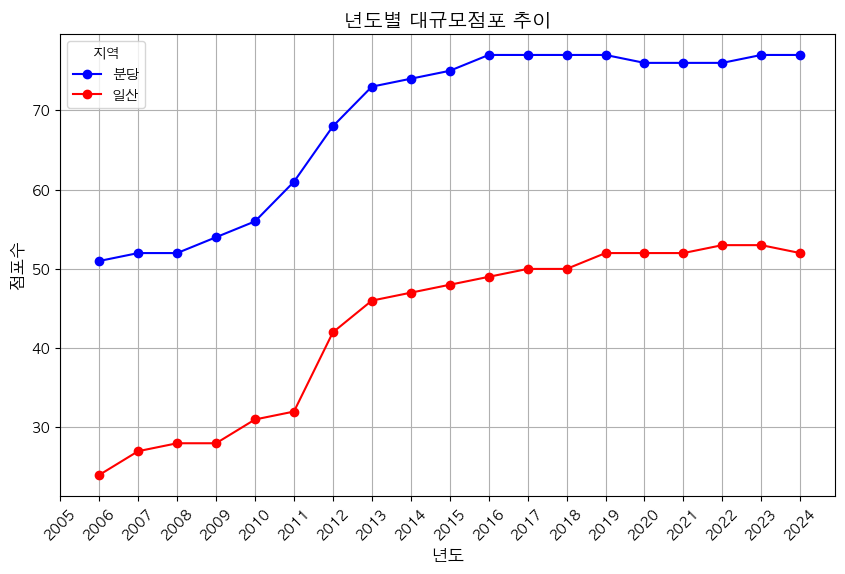

In [485]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['년도별갯수'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['년도별갯수'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 대규모점포 추이', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()

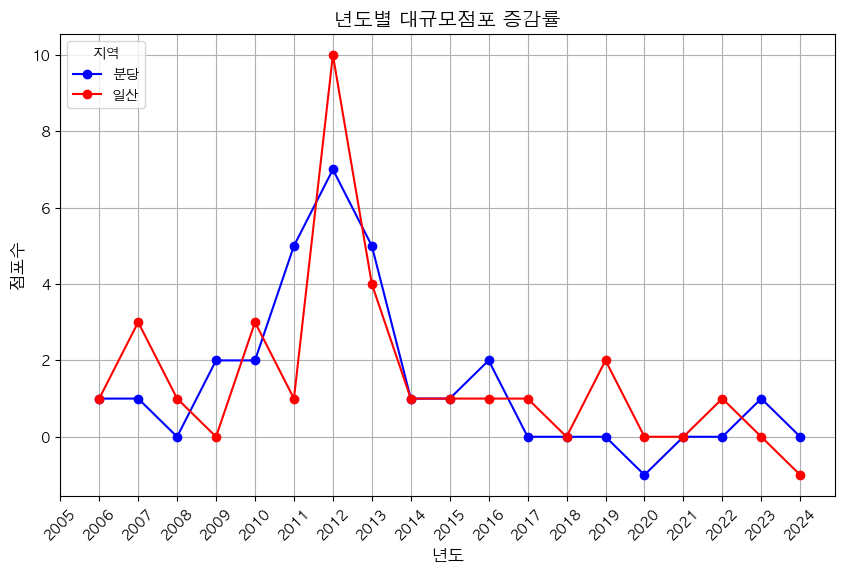

In [486]:
## 점포수
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(count_df_bundang.loc[1:]['년도'], count_df_bundang.loc[1:]['증감률'], marker='o', color='b', linestyle='-')
plt.plot(count_df_ilsan.loc[1:]['년도'], count_df_ilsan.loc[1:]['증감률'], marker='o', color='r', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('년도별 대규모점포 증감률', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('점포수', fontsize=12)

# x축 tick을 2006부터 2024까지 설정
plt.xticks(count_df_bundang['년도'], rotation=45)

# 격자 추가
plt.grid(True)

# 그래프에 레전드 추가
plt.legend(title='지역', labels=['분당', '일산'], loc='upper left')

# 그래프 출력
plt.show()